In [1]:
import pandas as pd
import numpy as np
import Preprocess
import pydicom
import matplotlib.pyplot as plt
import cv2

In [2]:
path = '/home/juhyeok/Documents/RSNA'
preprocess = Preprocess.Preprocess(path)

In [3]:
labels = preprocess.label_set('stage_1_train.csv', 0, 600)
labels.head(12)

,ID,Label,Sub_type,PatientID
361025,ID_000039fa0_any,0,any,000039fa0
361020,ID_000039fa0_epidural,0,epidural,000039fa0
361021,ID_000039fa0_intraparenchymal,0,intraparenchymal,000039fa0
361022,ID_000039fa0_intraventricular,0,intraventricular,000039fa0
361023,ID_000039fa0_subarachnoid,0,subarachnoid,000039fa0
361024,ID_000039fa0_subdural,0,subdural,000039fa0
3626117,ID_00005679d_any,0,any,00005679d
3626112,ID_00005679d_epidural,0,epidural,00005679d
3626113,ID_00005679d_intraparenchymal,0,intraparenchymal,00005679d
3626114,ID_00005679d_intraventricular,0,intraventricular,00005679d


In [4]:
new_label = labels[['Label', 'PatientID']]
ID_label = labels[['PatientID']]
count = 0
for e in ID_label.duplicated():
    if e == False:
        count += 1
print(count)

100


In [5]:
training_labels = labels['Label']
len(training_labels)

600

In [6]:
training_labels = np.array(training_labels)
training_labels = preprocess.categorize(training_labels)
len(training_labels)

100

In [18]:
# training_labels

In [7]:
path_dcmFiles = '/home/juhyeok/Documents/RSNA/stage_1_train_images/*.dcm'
dcm_files = Preprocess.Preprocess.read_dcm_files(path_dcmFiles)
len(dcm_files)
# type(dcm_files)

100

In [19]:
desired_size = (256, 256)

converted_training_imgs = []
converted_training_dcmData = [] # This will be used for 
for e in dcm_files:
    dcm_data = pydicom.dcmread(e)
    temp = preprocess.resizing(dcm_data, desired_size)
    converted_training_imgs.append(temp[0])
    converted_training_dcmData.append(temp[1])

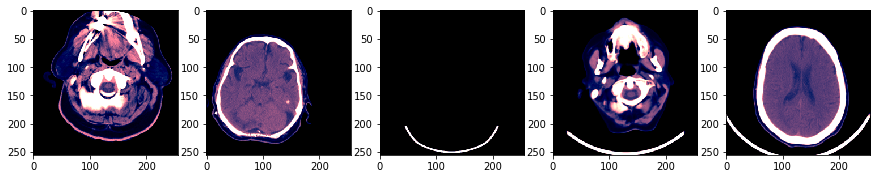

In [9]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i) 
    plt.imshow(converted_training_imgs[i], cmap=plt.cm.bone)



In [10]:
training_imgs = preprocess.transform_all_pixel_arrays(converted_training_dcmData, converted_training_imgs)

In [11]:
len(training_labels)

100

In [15]:
training_labels = np.array(training_labels) 

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               31490176  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [16]:
model.fit(training_imgs, training_labels, epochs=2, validation_split=0.10, shuffle=True)

Train on 90 samples, validate on 10 samples
Epoch 1/2
90/90 [==============================] - 4s 43ms/sample - loss: 3.3718 - accuracy: 0.5556 - val_loss: 2.6762 - val_accuracy: 0.7000
Epoch 2/2
90/90 [==============================] - 3s 39ms/sample - loss: 1.5263 - accuracy: 0.8667 - val_loss: 3.6373 - val_accuracy: 0.7000
